import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [ ]:
#Load the data and store the data into a data frame
data = pd.read_csv("TSLA Training.csv")
data.head()

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title("Closing Price Of Tesla")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()

In [ ]:
data.info()

#Get the number of rows and columns in the data set
data.shape

In [ ]:
#Spliting the dataset into training (70%) and testing (30%) set
#Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

In [ ]:
#Using MinMax scaler for normalization of the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [ ]:
data_training_array = scaler.fit_transform(train_close)

In [ ]:
x_train = []
y_train = [] 

for i in range(40, data_training_array.shape[0]):
    x_train.append(data_training_array[i-40: i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) #adding the batch_size axis
x_train.shape

In [ ]:
#Model building(LSTM)
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [ ]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu' , return_sequences=False ))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [ ]:
model.summary()

In [14]:
#Training the model
import tensorflow as tf
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=[tf.keras.metrics.MeanAbsoluteError()])
history= model.fit(x_train, y_train,epochs = 100, batch_size = 32)

27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 112ms/step - loss: 0.0033 - mean_absolute_error: 0.0392
Epoch 85/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - loss: 0.0034 - mean_absolute_error: 0.0376
Epoch 86/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 125ms/step - loss: 0.0028 - mean_absolute_error: 0.0352
Epoch 87/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 120ms/step - loss: 0.0035 - mean_absolute_error: 0.0401
Epoch 88/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.0034 - mean_absolute_error: 0.0373
Epoch 89/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0028 - mean_absolute_error: 0.0350
Epoch 90/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 136ms/step - loss: 0.0037 - mean_absolute_error: 0.0394
Epoch 91/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - loss: 0.0032 - mean_absolute_error: 0.0376
Epoch 92/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - loss: 0.0030 - mean_absolute_error: 0.0369
Epoch 93/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - loss: 0.0042 - mean_absolute_error: 0.0429
Epoch 94/100
27/27 ━━━━━

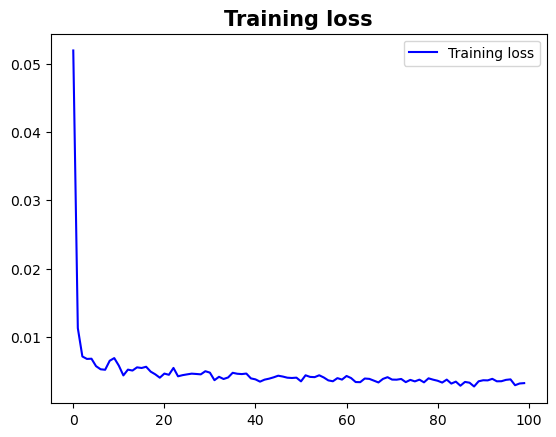

<Figure size 640x480 with 0 Axes>

In [15]:
loss = history.history['loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()
plt.show()

In [16]:
#Defining the final dataset for testing by including the last 100 columns of the training dataset to get the prediction from the 1st column of the testing dataset.
past_40_days = pd.DataFrame(train_close[-40:])

In [17]:
test_df = pd.DataFrame(test_close)

In [18]:
#Defining the final dataset for testing by including last 40 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.
final_data = pd.concat([past_40_days, test_df], ignore_index=True)

In [19]:
final_data.head()

,0
0,298.000000
1,303.226654
2,341.619995
3,339.476654
4,345.953339


In [20]:
input_data = scaler.fit_transform(final_data)
input_data

array([[0.62907874],
       [0.646393  ],
       [0.77357801],
       [0.7664778 ],
       [0.78793301],
       [0.83119666],
       [0.87200896],
       [0.97645788],
       [0.93605411],
       [0.98227712],
       [1.        ],
       [0.99136496],
       [0.92604984],
       [0.77207624],
       [0.82115923],
       [0.81625642],
       [0.7830302 ],
       [0.76091251],
       [0.8065613 ],
       [0.84441424],
       [0.85255239],
       [0.89747238],
       [0.91934714],
       [0.8665209 ],
       [0.87421738],
       [0.83658533],
       [0.89739515],
       [0.90597499],
       [0.85102859],
       [0.83954459],
       [0.76265722],
       [0.75607603],
       [0.80327076],
       [0.82227451],
       [0.75032301],
       [0.76493196],
       [0.70903587],
       [0.70031247],
       [0.71961436],
       [0.66542991],
       [0.67166879],
       [0.63563789],
       [0.67824998],
       [0.75592145],
       [0.82011017],
       [0.84985811],
       [0.84381798],
       [0.841

In [21]:
input_data.shape

(418, 1)

In [22]:
#Testing the model
x_test = []
y_test = []
for i in range(40, input_data.shape[0]):
   x_test.append(input_data[i-40: i])
   y_test.append(input_data[i, 0])

In [23]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(378, 40, 1)
(378,)


In [24]:
#Making prediction and plotting the graph of predicted vs actual values
# Making predictions

y_pred = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 233ms/step


In [25]:
y_pred.shape

(378, 1)

In [26]:
y_test

array([0.67166879, 0.63563789, 0.67824998, 0.75592145, 0.82011017,
       0.84985811, 0.84381798, 0.84130031, 0.82379832, 0.80882502,
       0.9667296 , 0.91130836, 0.84343149, 0.81757046, 0.77589693,
       0.81030465, 0.81723917, 0.86341799, 0.78097636, 0.80090766,
       0.77981689, 0.74132352, 0.74200814, 0.68417972, 0.66883095,
       0.6560219 , 0.67701329, 0.55741435, 0.57646228, 0.67625133,
       0.6702112 , 0.64195401, 0.62592063, 0.66145475, 0.64380911,
       0.65999716, 0.67103937, 0.64072834, 0.59153495, 0.60893767,
       0.66047191, 0.66153199, 0.60958913, 0.58820023, 0.5490553 ,
       0.48557324, 0.52613158, 0.53618003, 0.60305211, 0.59636043,
       0.61349807, 0.56866643, 0.56756217, 0.53033865, 0.55222443,
       0.59039764, 0.56757319, 0.52014665, 0.48814611, 0.52736828,
       0.56970438, 0.60434401, 0.64165588, 0.65906962, 0.73947944,
       0.74514421, 0.76149776, 0.75787592, 0.84753919, 0.85607495,
       0.84991331, 0.83181506, 0.83953357, 0.90673694, 0.84689

In [27]:
y_pred

array([[0.6875013 ],
       [0.6732639 ],
       [0.6586969 ],
       [0.64604455],
       [0.64043987],
       [0.6476375 ],
       [0.6697041 ],
       [0.70244145],
       [0.7384857 ],
       [0.7699588 ],
       [0.7918799 ],
       [0.81330234],
       [0.8330398 ],
       [0.8452745 ],
       [0.8478419 ],
       [0.840395  ],
       [0.8271209 ],
       [0.81169575],
       [0.79893726],
       [0.7867874 ],
       [0.77570444],
       [0.76509064],
       [0.75328666],
       [0.7405215 ],
       [0.725271  ],
       [0.7074144 ],
       [0.6877778 ],
       [0.6688792 ],
       [0.64850515],
       [0.627073  ],
       [0.6091801 ],
       [0.5979329 ],
       [0.5932196 ],
       [0.5930715 ],
       [0.5972036 ],
       [0.60389274],
       [0.61226916],
       [0.6218799 ],
       [0.6304245 ],
       [0.6342485 ],
       [0.6333645 ],
       [0.63115996],
       [0.63005865],
       [0.62856215],
       [0.6249005 ],
       [0.6172212 ],
       [0.60364443],
       [0.586

In [28]:
scaler.scale_

array([0.00331268])

In [29]:
scale_factor = 1/0.00331268
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

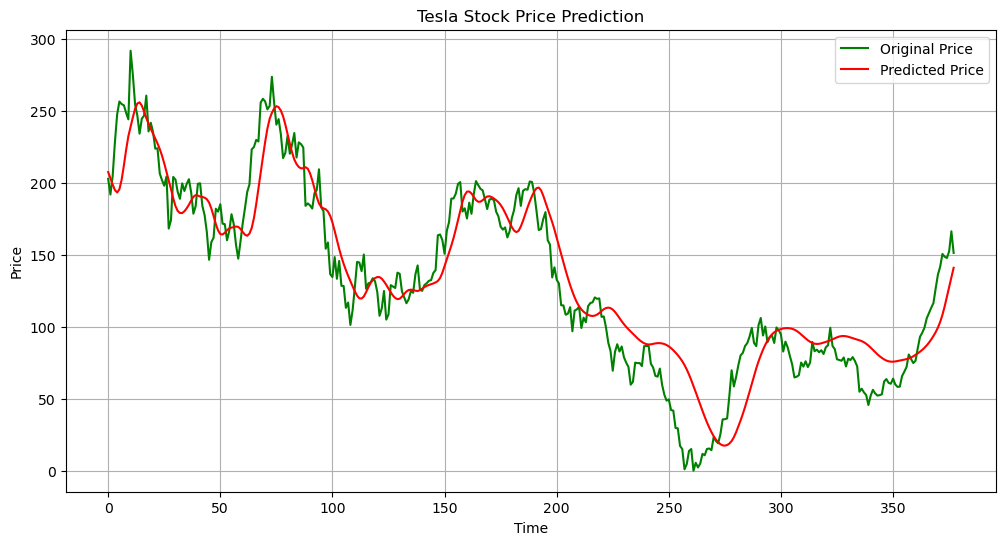

In [30]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'g', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
predictions = model.predict(x_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


In [32]:
#Model evaluation
#Calculation of mean absolute error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mae_percentage = (mae / np.mean(y_test)) * 40
print("Mean absolute error on test set: {:.2f}%".format(mae_percentage))

Mean absolute error on test set: 5.64%


In [33]:
# Calculate Mean Squared Error and R2 Score
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

Mean Squared Error: 544.5251189941763


In [34]:
Pred = model.predict(x_test)
Pred = scaler.inverse_transform(Pred)
RMSE = np.sqrt(np.mean(Pred - y_test)**2)
RMSE

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


111.22795031106693

In [35]:
#Calculation of R2 score

from sklearn.metrics import r2_score

# Actual values
actual = y_test

# Predicted values
predicted = y_pred

# Calculate the R2 score
r2 = r2_score(actual, predicted)

print("R2 score:", r2)

R2 score: 0.8699934873460764


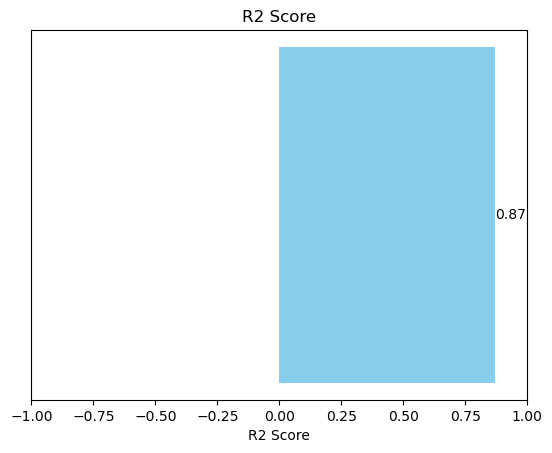

In [36]:
# Plotting the R2 score
fig, ax = plt.subplots()
ax.barh(0, r2, color='skyblue')
ax.set_xlim([-1, 1])
ax.set_yticks([])
ax.set_xlabel('R2 Score')
ax.set_title('R2 Score')

# Adding the R2 score value on the bar
ax.text(r2, 0, f'{r2:.2f}', va='center', color='black')

plt.show()

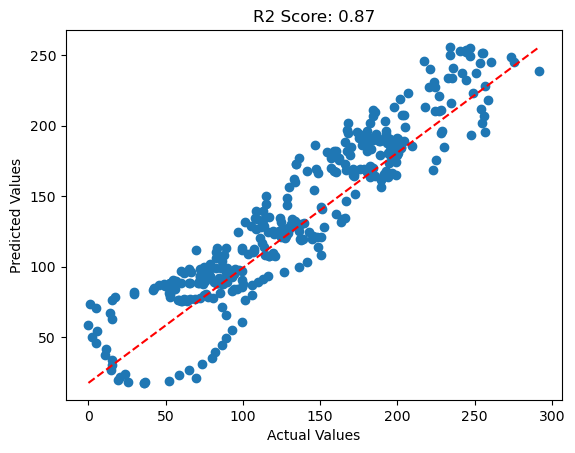

In [37]:
plt.scatter(actual, predicted)
plt.plot([min(actual), max(actual)], [min(predicted), max(predicted)], 'r--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'R2 Score: {r2:.2f}')
plt.show()